In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('train.csv')

In [137]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Univariate Analysis

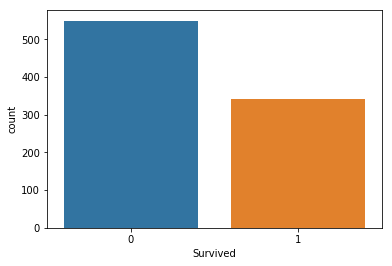

In [140]:
sns.countplot(x='Survived', data=df)

In [141]:
df.pivot_table(index='Survived', columns='Pclass', values='PassengerId', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


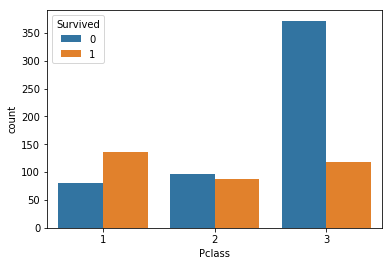

In [142]:
sns.countplot(x='Pclass', hue='Survived', data=df)

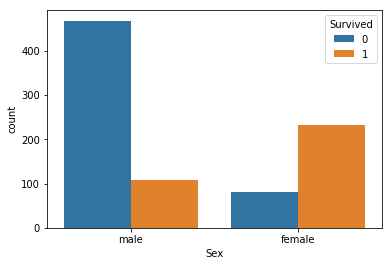

In [143]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [144]:
df.pivot_table(index='Survived', columns='SibSp', values='PassengerId', aggfunc='count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


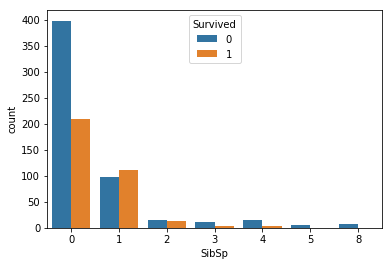

In [145]:
sns.countplot(x='SibSp', hue='Survived', data=df)

In [146]:
df.pivot_table(index='Survived', columns='Parch', values='PassengerId', aggfunc='count')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


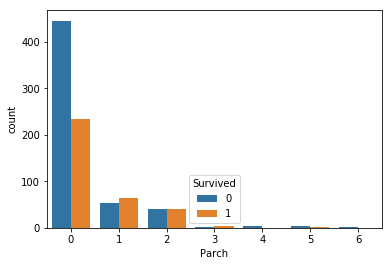

In [147]:
sns.countplot(x='Parch', hue='Survived', data=df)

In [148]:
df.pivot_table(index='Survived', columns='Parch', values='PassengerId', aggfunc='count')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [149]:
df.pivot_table(index='Survived', columns='Embarked', values='PassengerId', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


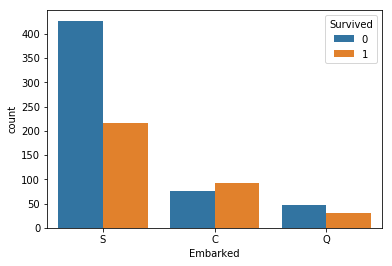

In [150]:
sns.countplot(x='Embarked', hue='Survived', data=df)

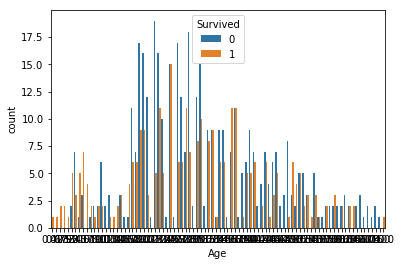

In [151]:
sns.countplot(x='Age', hue='Survived', data=df)

In [152]:
df['AgeBin'] = pd.qcut(df['Age'],3, labels=['Young', 'Adult', 'Old'])

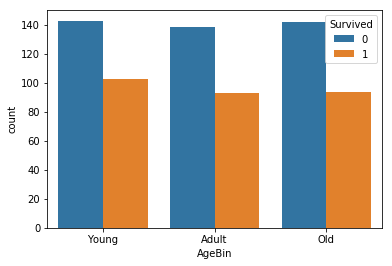

In [153]:
sns.countplot(x='AgeBin', hue='Survived', data=df)

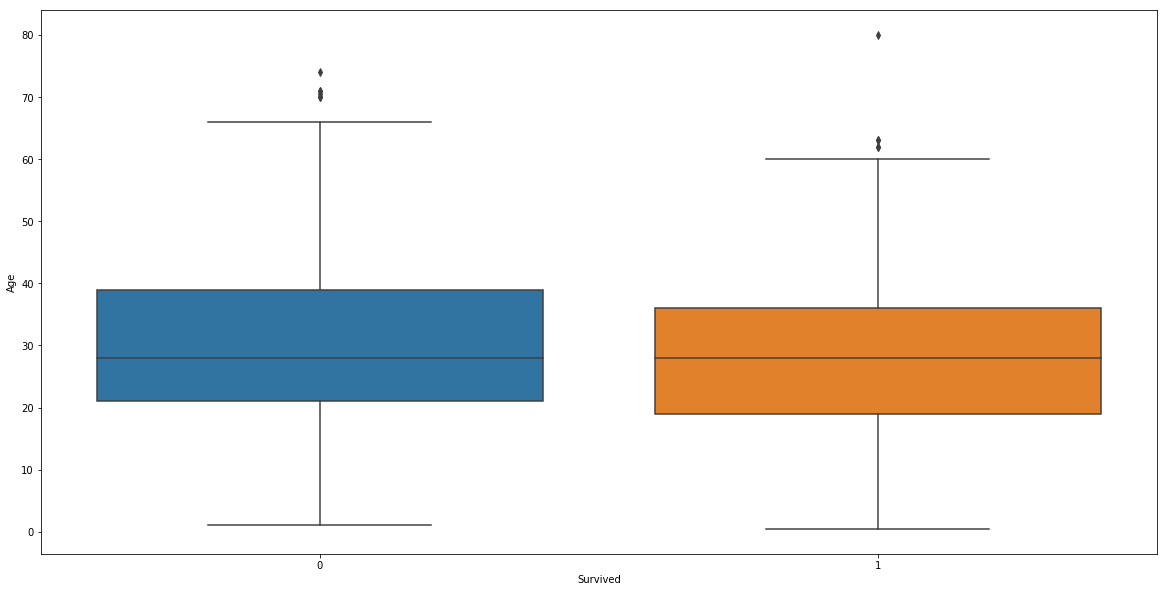

In [154]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(y='Age', x='Survived', data=df, ax=ax)

## Bivariate Analysis

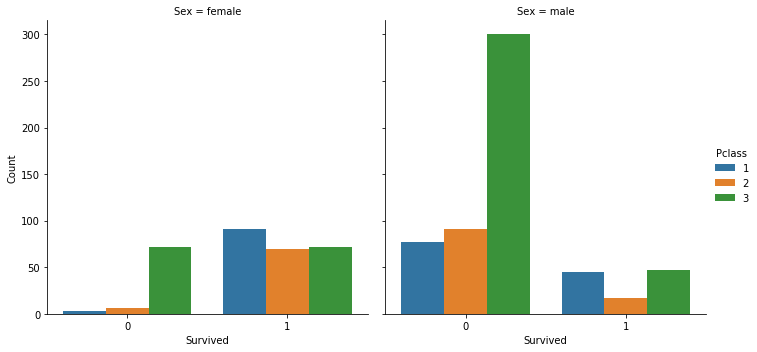

In [155]:
d = df.groupby(['Survived', 'Sex', 'Pclass'], as_index=False)['PassengerId'].count()
d.rename(columns={'PassengerId': 'Count'}, inplace=True)
sns.catplot(x='Survived', y='Count', hue='Pclass', col='Sex', data=d, kind='bar')

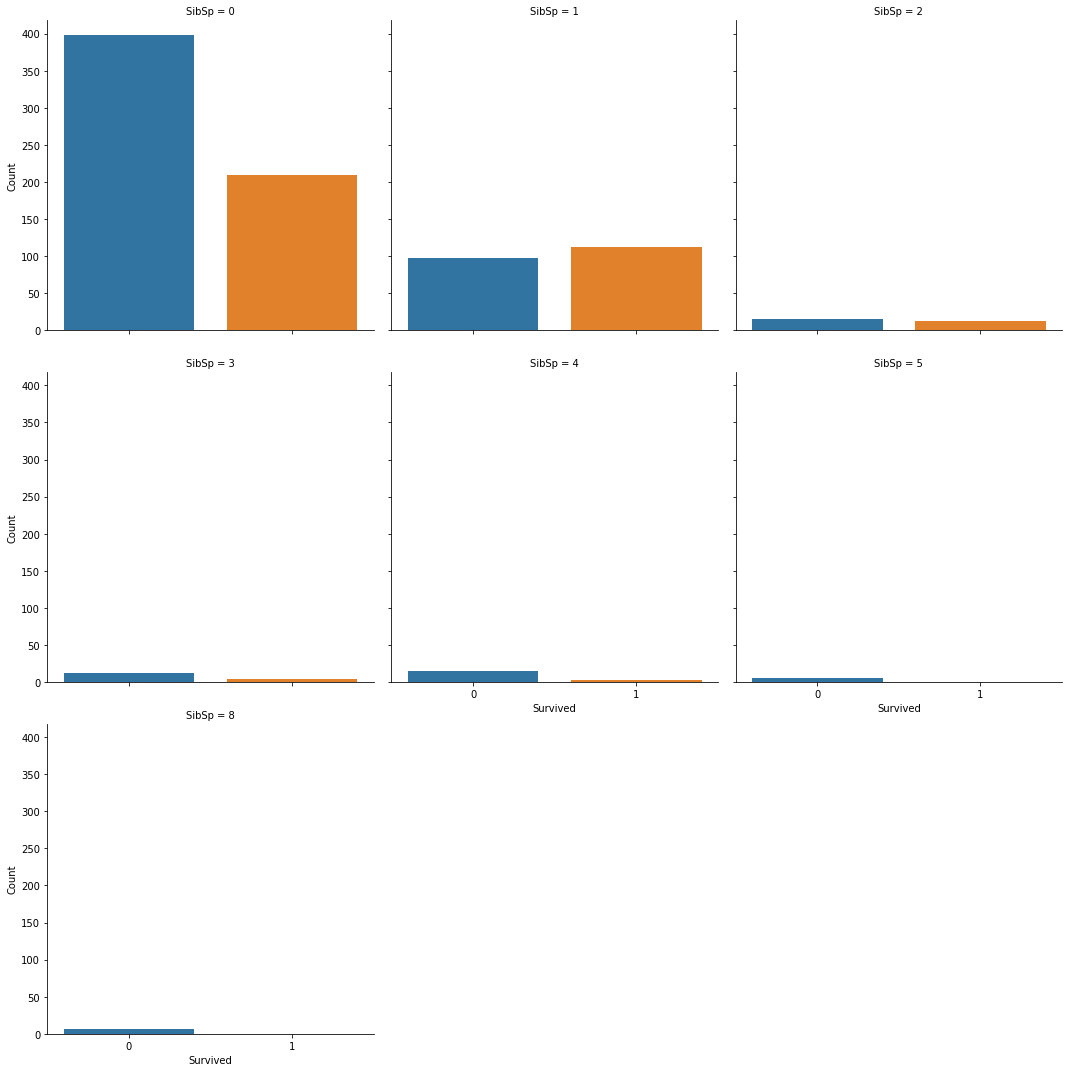

In [156]:
d = df.groupby(['SibSp', 'Survived'], as_index=False)['PassengerId'].count()
d.rename(columns={'PassengerId':'Count'}, inplace=True)
sns.catplot(x='Survived', y='Count', col='SibSp', col_wrap=3, data=d, kind='bar')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeBin         714 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.6+ KB


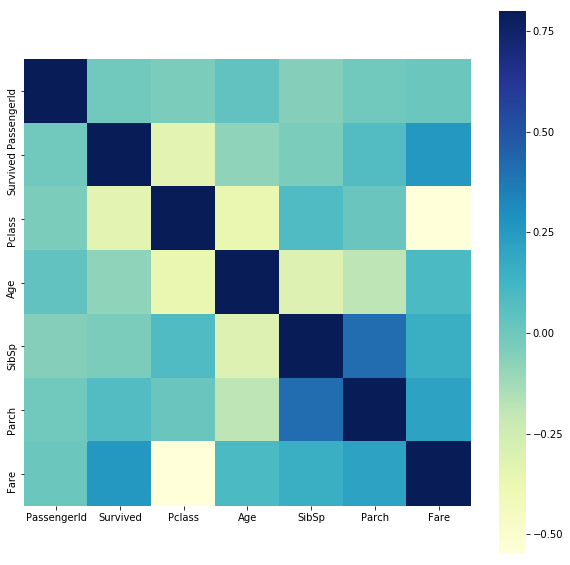

In [158]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu')

In [159]:
df = df.drop('AgeBin', axis=1)

# Missing values and outliers treatment

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [161]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
mmean = df.loc[df['Sex'] == 'male', 'Age'].mean()
fmean = df.loc[df['Sex'] == 'female', 'Age'].mean()
mmean, fmean

(30.72664459161148, 27.915708812260537)

In [163]:
df.loc[(df['Sex'] == 'male') & (df['Age'].isna()), 'Age'] = mmean
df.loc[(df['Sex'] == 'female') & (df['Age'].isna()), 'Age'] = fmean

In [164]:
df = df.drop('Cabin', axis=1)

In [165]:
# Making bins for Age
# bins = [0,20,40,80]
# group = ['Young', 'Middle', 'Old']
# df['Age'] = pd.cut(df['Age'], bins, labels=group)

In [166]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [167]:
y = df['Survived']
X = df.drop('Survived', axis=1)

In [168]:
X1 = X.copy()

In [169]:
X = X.drop('Name', axis=1)

In [170]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [171]:
X = X.drop(['Ticket', 'PassengerId'], axis=1)

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [173]:
X = pd.get_dummies(X)

In [174]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [175]:
X_final = pd.concat([X,y],axis=1)

In [176]:
X_final.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived'],
      dtype='object')

In [177]:
X_final.to_csv("titanic_final.csv", index=False)